# Sympy

This note was prepared by Renan based on the video lecture at [SymPy (Symbolic Expressions on Python) in one video](https://youtu.be/kx2GzBeGPco)

In [0]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
x= symbols('x')

In [0]:
f= (x**2+1)/(x-1)
f

(x**2 + 1)/(x - 1)

### Substituição

In [0]:
f.subs(x,1) #O output quer dizer infinito

zoo

In [0]:
sqrt(2)

sqrt(2)

In [0]:
N(sqrt(2))

1.41421356237310

## Usando funções em gráfico

Text(0.5, 1.0, 'Função seno(x)')

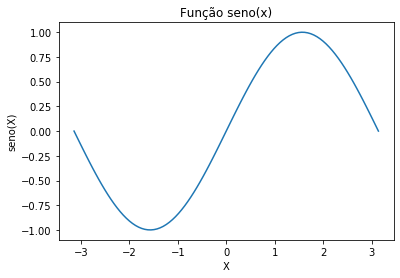

In [0]:
f=sin(x)
fx=lambdify(x,f)
xvals=np.linspace(-1*np.pi,np.pi,100)
plt.plot(xvals,fx(xvals))
plt.xlabel('X')
plt.ylabel('seno(X)')
plt.title('Função seno(x)')

In [0]:
print(ceiling(2.5)) #Sempre arredonda pra cima
print(floor(2.5)) #Sempre pra baixo
print(frac(2.98)) #Pega o decimal

3
2
0.980000000000000


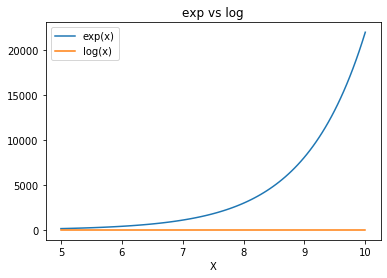

In [0]:
f=exp(x)
g=log(x)
fx=lambdify(x,f)
gx=lambdify(x,g)
xvals=np.linspace(5,10,100)
plt.plot(xvals,fx(xvals),label='exp(x)')
plt.plot(xvals,gx(xvals),label='log(x)')
plt.xlabel('X')
plt.title('exp vs log')
plt.legend()

In [0]:
pprint(Integral((x**2+1)/(x-1))) #Imprima bonito qualquer coisa!

⌠          
⎮  2       
⎮ x  + 1   
⎮ ────── dx
⎮ x - 1    
⌡          


In [0]:
matriz= Matrix(((1,1,1),(1,1,2),(2,1,-1)))
pprint(matriz)

⎡1  1  1 ⎤
⎢        ⎥
⎢1  1  2 ⎥
⎢        ⎥
⎣2  1  -1⎦


# Simplificação

In [0]:
f=sin(x)**2+cos(x)**2
f

sin(x)**2 + cos(x)**2

In [0]:
f.simplify()

1

In [0]:
f.trigsimp() #Mesma coisa mas focada mais em trigonométricas.

1

In [0]:
f= x**3-x**2+x-1
pprint(f.simplify())

 3    2        
x  - x  + x - 1


In [0]:
pprint(f.factor())

        ⎛ 2    ⎞
(x - 1)⋅⎝x  + 1⎠


In [0]:
a=symbols('a')
b=symbols('b')
pprint(collect(a*x**2+b*x**2+a*x-b*x,x)) #Evidência

 2                    
x ⋅(a + b) + x⋅(a - b)


In [0]:
cancel(x**2/x) #Comando mais dedicado a cancelar num e den. Simplify da no mesmo.

x

### Potências e logs

In [0]:
powsimp(x**a*x**b,)

x**(a + b)

In [0]:
logcombine(a*log(x),force=True) #Argumento force em todos pode dar problemas quando mistura com
                                #números imaginários, cuidado se isso existir.

log(x**a)

# Expansão

In [0]:
f=(x+2)**2
f.expand()

x**2 + 4*x + 4

In [0]:
f= sin(x+a)         #Veja que aqui deu diferença, ele serve para
pprint(f.expand())  #trigonométricas e só funciona antes do objeto
pprint(expand_trig(f)) #<---

sin(a + x)
sin(a)⋅cos(x) + sin(x)⋅cos(a)


In [0]:
apart((x+1)/x)

1 + 1/x

In [0]:
#A famosa decomposição de frações parciais, boa pra integrar depois, lembra?
f=(4*x**3+21*x**2+10*x+12)/(x**4+5*x**3+5*x**2+4*x)
pprint(f.apart())

 2⋅x - 1       1     3
────────── - ───── + ─
 2           x + 4   x
x  + x + 1            


### Potências e logs

In [0]:
pprint(expand_power_exp(x**(a+b)))

 a  b
x ⋅x 


In [0]:
expand_log(log(x**2),force=True)

2*log(x)

In [0]:
f=binomial(a,x)
pprint(f)

⎛a⎞
⎜ ⎟
⎝x⎠


In [0]:
pprint(f.subs(a,2).subs(x,2)) #para substituir os dois valores

1


# Cálculo

### Derivadas

In [0]:
f=cos(x)
df=diff(f,x)
print(df)
ddf=diff(df,x)
ddf

-sin(x)


-cos(x)

In [0]:
diff(f,x,2) #Número de derivadas, deu o mesmo.
            #Apenas mude o símbolo para derivar em outra variável.

-cos(x)

In [0]:
f= 2*x*a + 4*x**2*a #Aqui derivando em x e depois em a. Ou vice e versa
diff(f,x,a)         #porque a propriedade diz que começar em um ou outro da no mesmo.

2*(4*x + 1)

### Integrais

In [0]:
df= exp(-x)
integrate(df,(x,0,oo)) #infinito é dois ós

1

In [0]:
pprint(integrate(df,x)) #Integral indefinida

  -x
-ℯ  


In [0]:
#Aqui é uma integral do tipo SS ... dxdy 
integrate(exp(-x**2-a**2),(x,-oo,oo),(a,-oo,oo))

pi

### Limite

In [0]:
limit(sin(x))

1

In [0]:
#Diferença de lados positivos e negativos
print(limit(1/x,x,0,'+'))
limit(1/x,x,0,'-')

oo


-oo

# Solvers

In [0]:
#Construindo equação, algo = a algo
Eq(x**2,1)

Eq(x**2, 1)

In [0]:
solveset(Eq(x**2,1),x) #Todas as soluções possíveis

{-1, 1}

In [0]:
pprint(solveset(sin(x)-1,x)) #Ciclo de soluções!

⎧        π        ⎫
⎨2⋅n⋅π + ─ | n ∊ ℤ⎬
⎩        2        ⎭


### Sistema de equações lineares

In [0]:
#Isole a equação para igualar a zero, escreva
y,z=symbols('y z')
linsolve([x+y+z-1,x+y+2*z-3,2*x+y-z-10],(x,y,z))

{(13, -14, 2)}

In [0]:
#Um caso de solução impossível, também te dá caso seja indeterminado, fica em função de var
pprint(linsolve((x+y+z-1,x+y+2*z-3,x+y-z-5),(x,y,z)))

∅


### Sistema de equações não lineares

In [0]:
nonlinsolve((x**2+1,y**2+1),(x,y))

{(-I, -I), (-I, I), (I, -I), (I, I)}